In [1]:
import pandas as pd
import numpy as np 

import boto3
import sagemaker.amazon.common as smac

In [2]:
# Function to download data from S3

def download_from_s3(filename, bucket, key):
    with open(filename, 'wb') as f: #Write in Binary Mode
        return boto3.resource('s3').Bucket(bucket).Object(key).download_fileobj(f)

In [5]:
download_from_s3('Ads_Ctr', 'sara-ml-sagemaker', 'UCB/Ads_CTR_Optimisation.csv')

In [6]:
AdsData = pd.read_csv('Ads_Ctr')

In [7]:
AdsData.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

In [9]:
import math

In [11]:
# Implementing UCB
# Step 1: At each round n (iteration), we consider two number for each (i) ad:
# Ni(n) - the number of times the advert i was selected up to round n,
# For this we create a vector of size 'd' and initially the number of selections for all the adverts is '0'
# So we create initialise it to a vector of [0] and then multiply it by d


N = 10000 # Number of iterations (10k customers selected to study the selection of adverts)

d = 10 # Number of adverts created

ads_selected = [] # this gives the vector of ads that were selected for each iteration 
number_of_selections = [0] * d

# Ri(n) - the sum of revards of the advert i receives upto to round n
# Similarly for the first rounds the sums of the rewards for the selected adverts is [0] * d
sums_of_rewards = [0] * d

# Step2: From these 2 numbers we comput:
# The average reward for advert i up to round n 
# ri(n) = Ri(n)/Ni(n)

# Confidence interval [ri(n) - sum((n), ri(n))i + sum(n)i] at round n with 
# sum(n)i = sqrt(3/2*((log(n))/(Ni(n))))
total_reward = 0
for n in range(0, N):
    advert = 0
    # the max_upper_bound is different at each iteration there it needs initialized for each iteration
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i]/number_of_selections[i]
            # indexes in python start at 0 therefore for math operation we should consider the first iteration as n+1 = 0+1 =1  
            delta_i = math.sqrt(3/2 * math.log(n + 1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            # A very high value is assigned to upper_bound, 
            # So that all the adverts are selected and tried out.
            # Refer to ucb python part 3 lecture for this explanation
            upper_bound = 1e400
        # Also for each advert, upper_bound is compared to the max upper upper bound and then replaced by new higher value
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            advert = i
    ads_selected.append(advert)
    number_of_selections[advert] = number_of_selections[advert] + 1
    # Reward at round n 
    reward = AdsData.values[n, advert]
    sums_of_rewards[advert] = sums_of_rewards[advert] + reward
    total_reward = total_reward + reward

In [12]:
total_reward

2178

In [ ]:
# We will plot a histogram to showcase the selection of adverts 
# this will indicate which advert was most liked by the customers

Text(0,0.5,'Number of times each Advert was selected')

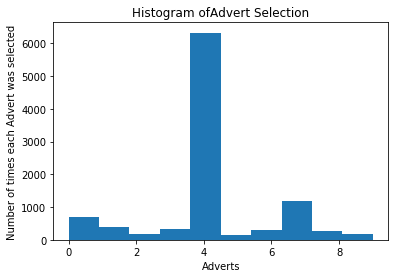

In [16]:
# Visualise the results
plt.hist(ads_selected)
plt.title('Histogram ofAdvert Selection')
plt.xlabel('Adverts')
plt.ylabel('Number of times each Advert was selected')

In [ ]:
# Advert index number 4 (Advert 5) was selected the maximum number of times.
# So clearly advert 5 is selected to be showcased to the customers.